In [1]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement =  read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

In [2]:
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [3]:
from datetime import datetime as dt

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date,'%Y-%m-%d')

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

#更新注册表中的数据
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])

In [4]:
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [5]:
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': u'0.0',
 u'num_courses_visited': u'1.0',
 u'projects_completed': u'0.0',
 u'total_minutes_visited': u'11.6793745',
 u'utc_date': u'2015-01-09'}

In [6]:
#更新参与表中的数据
for engagement_record in  daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [7]:
project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': u'2015-01-16',
 u'creation_date': u'2015-01-14',
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [8]:
#更新项目提交表中的数据
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])
project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [9]:
#把参与记录表中的acct列替换为account_key列
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]
daily_engagement[0]

{'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [10]:
#获取各个表中的学生人数
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [11]:
unique_enrolled_students = get_unique_students(enrollments)
unique_engagement_students = get_unique_students(daily_engagement)
unique_project_submitters = get_unique_students(project_submissions)

In [12]:
#为什么注册表中的学生比参与表中的多？打印出异常点，即在注册表中出现而没有在参与表中出现的数据
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


In [13]:
#检查是否还存在其它的异常点，结果剩下三个是测试账号
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students and enrollment['join_date'] != enrollment['cancel_date']):
        print enrollment
        num_problem_students += 1
num_problem_students

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


3

In [14]:
#找出一共有几个测试账号
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [15]:
#删除测试账号函数
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [16]:
#删除三个表格中的测试账号信息
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


In [17]:
#创建未注销学生或者注销前注册超过七天学生的字典
paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if (account_key not in paid_students or enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
len(paid_students)

995

In [18]:
#获取第一周数据
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

In [19]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [20]:
paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

6919

In [21]:
from collections import defaultdict

#将参与数据按照账户值进行分组
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [22]:
#将各账户的访问时间相加
total_minutes_by_account = {}

for account_key,engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [23]:
total_minutes = total_minutes_by_account.values()

import numpy as np
#计算参与时长的平均值、标准差、最大值以及最小值
print 'Mean:',np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Mininum:', np.min(total_minutes)
print 'Maximum',np.max(total_minutes)#有问题，时长比一周的总时长还大

Mean: 306.708326753
Standard deviation: 412.996933409
Mininum: 0.0
Maximum 3564.7332645


In [24]:
#找出学习时长最长的那个学生
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

max_minutes

3564.7332644989997

In [25]:
#打印出学习时长最长学生的参与记录
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163

In [26]:
from collections import defaultdict

#按照账户值对记录进行分组
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')

In [27]:
#计算各账户值的条目总数
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account,'total_minutes_visited')

In [28]:
import numpy as np

#输出统计数据
def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)

describe_data(total_minutes_by_account.values())

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


In [29]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account,'lessons_completed')
describe_data(lessons_completed_by_account.values())

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


In [30]:
days_visited_by_account = sum_grouped_items(engagement_by_account,'has_visited')
describe_data(days_visited_by_account.values())

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


In [31]:
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)

647

In [32]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


In [33]:
#按账户值分别对通过的和没通过的学生进行分组
passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')

#计算并输出未通过学生上课时长的统计数据
print 'non-passing students:'
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account,'total_minutes_visited')
describe_data(non_passing_minutes.values())

#计算并输出已通过学生上课时长的统计数据
print 'passing students:'
passing_minutes = sum_grouped_items(passing_engagement_by_account,'total_minutes_visited')
describe_data(passing_minutes.values())


non-passing students:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933
passing students:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


non-passing students:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27
passing students:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36


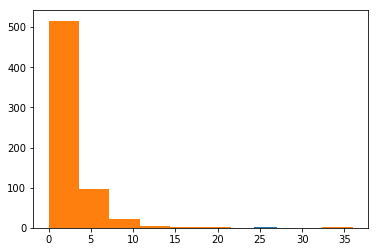

In [37]:
#分别输出通过学生和未通过学生的每周课程完成数量
print 'non-passing students:'
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account,'lessons_completed')
describe_data(non_passing_lessons.values())

print 'passing students:'
passing_lessons = sum_grouped_items(passing_engagement_by_account,'lessons_completed')
describe_data(passing_lessons.values())

non-passing students:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7
passing students:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


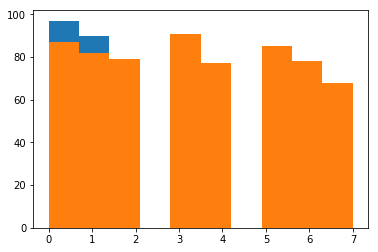

In [38]:
#输出通过学生和未通过学生每周登录天数
print 'non-passing students:'
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')
describe_data(non_passing_visits.values())

print 'passing students:'
passing_visits = sum_grouped_items(passing_engagement_by_account,'has_visited')
describe_data(passing_visits.values())

Populating the interactive namespace from numpy and matplotlib
Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


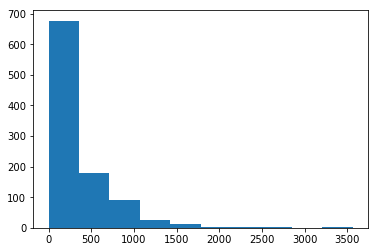

In [39]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np

# Summarize the given data
def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    #输出直方图
    plt.hist(data)
    
total_minutes = total_minutes_by_account.values()
describe_data(total_minutes)    